# US Honey consumption case study

In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Loading the dataset
df= pd.read_csv('US_honey_dataset.csv')
df.head()

,Unnamed: 0,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,0,Alabama,16000,58,928000,28000,62.0,575000,1995
1,1,Arizona,52000,79,4108000,986000,68.0,2793000,1995
2,2,Arkansas,50000,60,3000000,900000,64.0,1920000,1995
3,3,California,420000,93,39060000,4687000,60.0,23436000,1995
4,4,Colorado,45000,60,2700000,1404000,68.0,1836000,1995


In [3]:
#Finding data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1115 non-null   int64  
 1   state                1115 non-null   object 
 2   colonies_number      1115 non-null   int64  
 3   yield_per_colony     1115 non-null   int64  
 4   production           1115 non-null   int64  
 5   stocks               1115 non-null   int64  
 6   average_price        1115 non-null   float64
 7   value_of_production  1115 non-null   int64  
 8   year                 1115 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 78.5+ KB


In [4]:
#Statistical data about our data
df.describe(include='all')

,Unnamed: 0,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
count,1115.00000,1115,1115.000000,1115.000000,1.115000e+03,1.115000e+03,1115.000000,1.115000e+03,1115.000000
unique,NaN,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Iowa,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,557.00000,NaN,62438.565022,59.743498,2.851268e+06,1.172625e+06,140.623076,5.667412e+06,2007.740807
std,322.01708,NaN,92648.175955,19.940500,5.561202e+06,2.049556e+06,107.011544,9.459460e+06,7.823002
min,0.00000,NaN,2000.000000,19.000000,1.200000e+04,9.000000e+03,1.300000,1.060000e+05,1995.000000
25%,278.50000,NaN,9000.000000,45.000000,2.460000e+05,1.125000e+05,70.000000,1.008000e+06,2001.000000
50%,557.00000,NaN,26000.000000,57.000000,8.280000e+05,3.700000e+05,128.000000,2.281000e+06,2008.000000
75%,835.50000,NaN,69000.000000,71.000000,2.700000e+06,1.253500e+06,193.000000,5.704000e+06,2015.000000


In [5]:
df.head()

,Unnamed: 0,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,0,Alabama,16000,58,928000,28000,62.0,575000,1995
1,1,Arizona,52000,79,4108000,986000,68.0,2793000,1995
2,2,Arkansas,50000,60,3000000,900000,64.0,1920000,1995
3,3,California,420000,93,39060000,4687000,60.0,23436000,1995
4,4,Colorado,45000,60,2700000,1404000,68.0,1836000,1995


In [6]:
df['state'].unique()

array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'NewJersey', 'NewMexico', 'NewYork',
       'NorthCarolina', 'NorthDakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'SouthCarolina', 'SouthDakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'WestVirginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [7]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [8]:
df.head()

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,Alabama,16000,58,928000,28000,62.0,575000,1995
1,Arizona,52000,79,4108000,986000,68.0,2793000,1995
2,Arkansas,50000,60,3000000,900000,64.0,1920000,1995
3,California,420000,93,39060000,4687000,60.0,23436000,1995
4,Colorado,45000,60,2700000,1404000,68.0,1836000,1995


In [9]:
#Checking if there is any null data in the dateset to clean the data
df.isnull().sum()

state                  0
colonies_number        0
yield_per_colony       0
production             0
stocks                 0
average_price          0
value_of_production    0
year                   0
dtype: int64

In [10]:
#Checking if there is any duplicated data in the dateset to clean the data
df.duplicated().sum()

0

# Top Honey producing state

<AxesSubplot:xlabel='production', ylabel='state'>

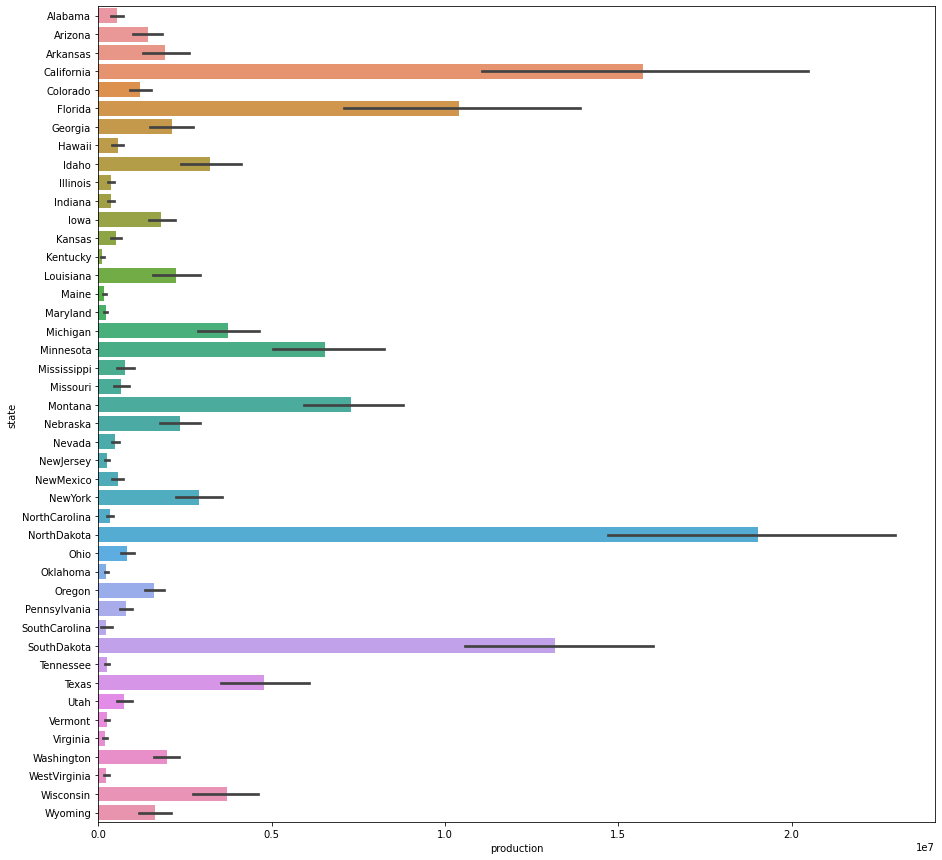

In [11]:
plt.figure(figsize=(15,15))
sns.barplot(y=df['state'],x=df['production'])

In [12]:
ma=df['production'].max()
print(ma)
df[df['production']==ma]['state']

39060000


3    California
Name: state, dtype: object

In [13]:
#California is the highest honey producing state 

# Find the mean average price from 1995-2021

In [14]:
df1= df.groupby('year').mean()

[]

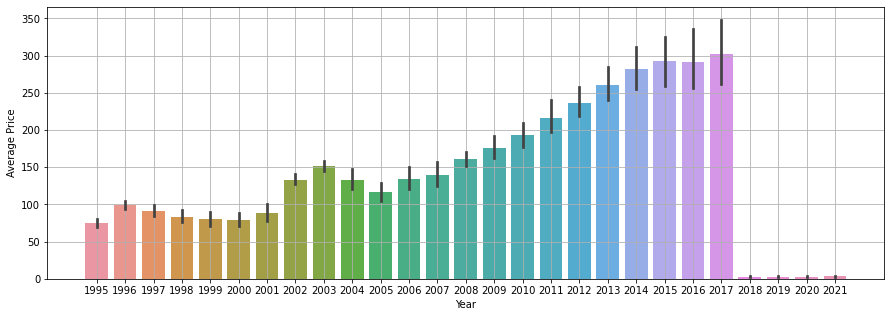

In [15]:
plt.figure(figsize=(15,5))
sns.barplot(x=df['year'],y=df['average_price'])
plt.grid()
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.plot()

# Year with Highest production

In [16]:
df[df['production']==df['production'].max()]['year']

3    1995
Name: year, dtype: int64

[]

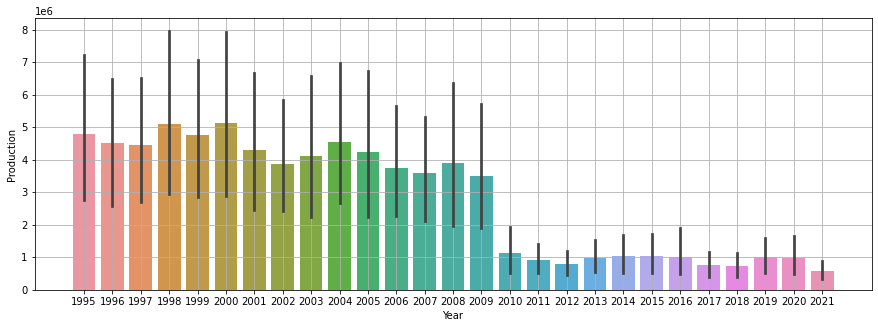

In [17]:
plt.figure(figsize=(15,5))
sns.barplot(y=df['production'],x=df['year'])
plt.grid()
plt.xlabel('Year')
plt.ylabel('Production')
plt.plot()

In [18]:
#1995 is the year of highest production

# Pie chart of production of Honey in %age from 1995-2021

In [28]:
df1=df.groupby('year').mean()
df1.head()

,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production
year,,,,,,
1995,59977.272727,66.909091,4.778909e+06,9.575000e+05,74.840909,3.121000e+06
1996,58181.818182,70.068182,4.499886e+06,1.066455e+06,99.568182,4.085773e+06
1997,59651.162791,68.953488,4.445953e+06,1.601256e+06,91.325581,3.386000e+06
1998,60883.720930,69.953488,5.100488e+06,1.871488e+06,83.720930,3.395302e+06
1999,62186.046512,65.465116,4.757791e+06,1.839698e+06,80.325581,2.888070e+06


In [30]:
df1=df1.reset_index()

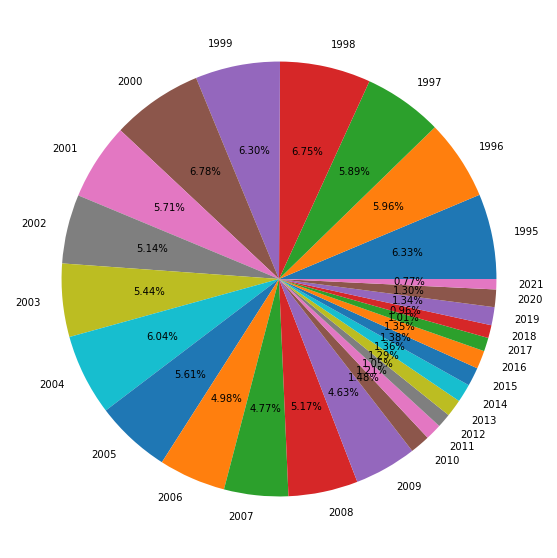

In [31]:
plt.figure(figsize=(10,10))
plt.pie(df1['production'],labels=df1['year'],autopct="%1.2f%%")
plt.show()

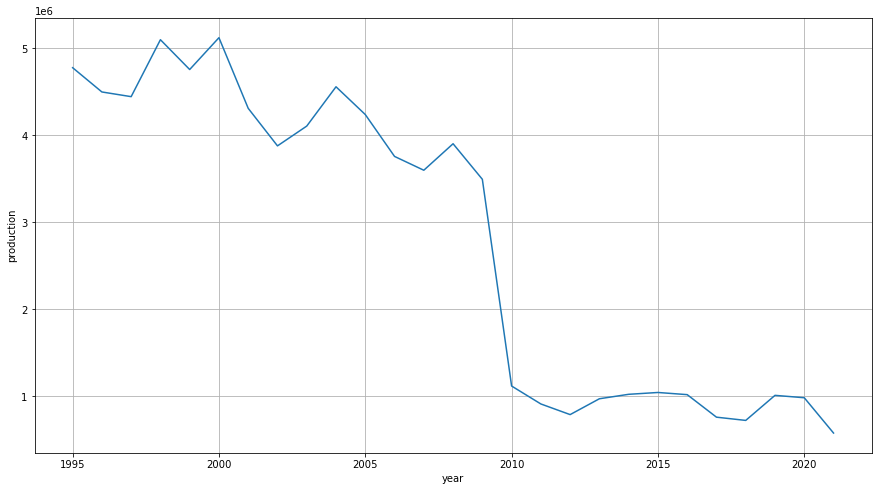

In [32]:
plt.figure(figsize=(15,8))
sns.lineplot(x=df1['year'],y=df1['production'])
plt.grid()
plt.show()

In [33]:
df2=df.groupby('year').mean()

In [34]:
df2.reset_index(inplace=True)

In [35]:
df2.head()

,year,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production
0,1995,59977.272727,66.909091,4.778909e+06,9.575000e+05,74.840909,3.121000e+06
1,1996,58181.818182,70.068182,4.499886e+06,1.066455e+06,99.568182,4.085773e+06
2,1997,59651.162791,68.953488,4.445953e+06,1.601256e+06,91.325581,3.386000e+06
3,1998,60883.720930,69.953488,5.100488e+06,1.871488e+06,83.720930,3.395302e+06
4,1999,62186.046512,65.465116,4.757791e+06,1.839698e+06,80.325581,2.888070e+06


In [36]:
df2=df2.sort_values(by='production',ascending=False)

In [37]:
df2.head(5)

,year,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production
5,2000,60860.465116,67.534884,5.123721e+06,1.997395e+06,79.023256,3.047023e+06
3,1998,60883.720930,69.953488,5.100488e+06,1.871488e+06,83.720930,3.395302e+06
0,1995,59977.272727,66.909091,4.778909e+06,9.575000e+05,74.840909,3.121000e+06
4,1999,62186.046512,65.465116,4.757791e+06,1.839698e+06,80.325581,2.888070e+06
9,2004,63325.000000,65.025000,4.559475e+06,1.523100e+06,132.350000,4.976100e+06


[]

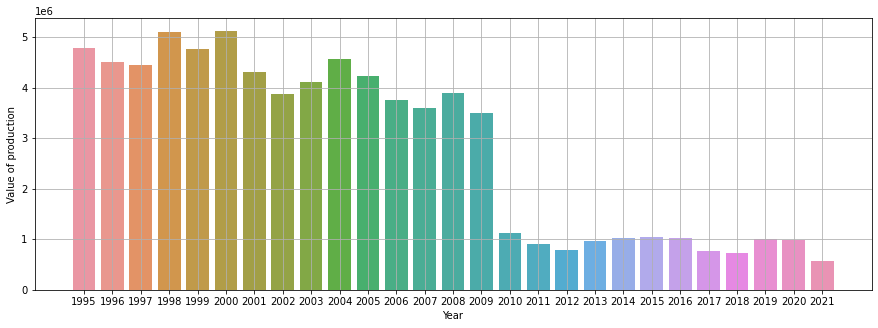

In [38]:
plt.figure(figsize=(15,5))
sns.barplot(x=df2['year'],y=df2['production'])
plt.grid()
plt.xlabel('Year')
plt.ylabel('Value of production')
plt.plot()

In [39]:
#2000 is the year when the value of production is the highest

# In which year price of honey is highest

[]

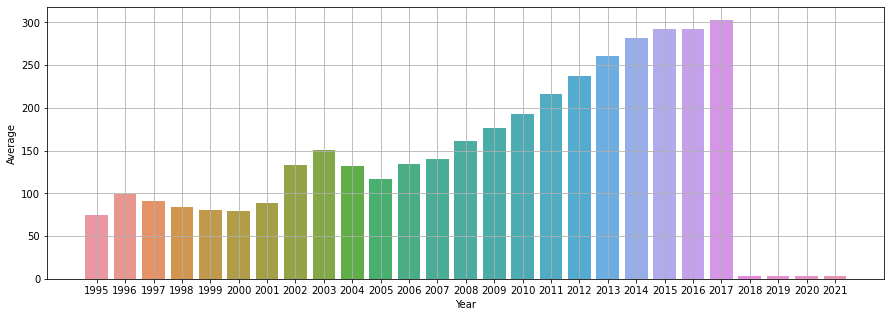

In [40]:
plt.figure(figsize=(15,5))
sns.barplot(x=df2['year'],y=df2['average_price'])
plt.grid()
plt.xlabel('Year')
plt.ylabel('Average')
plt.plot()

In [41]:
#2017 is the year with highest Average price

# State with the Highest number of stocks

In [42]:
df3 = df.groupby('state').sum()

In [43]:
df3.reset_index(inplace=True)

[]

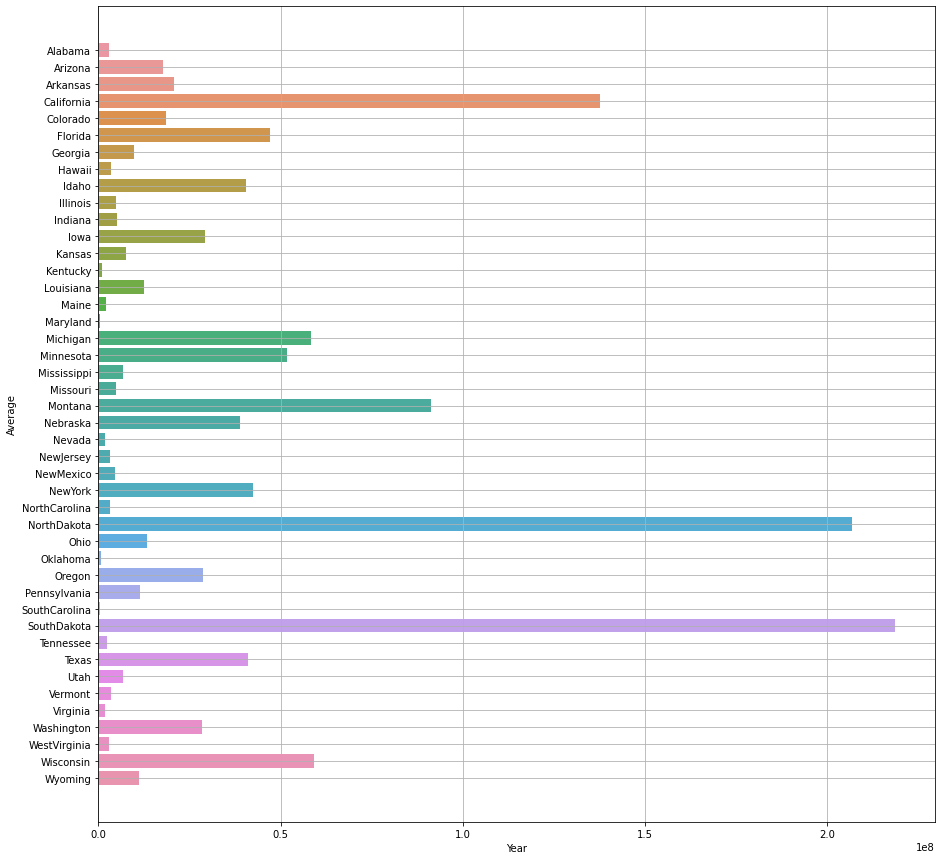

In [44]:
plt.figure(figsize=(15,15))
sns.barplot(x=df3['stocks'],y=df3['state'])
plt.grid()
plt.xlabel('Year')
plt.ylabel('Average')
plt.plot()

In [45]:
#South Dakota has the highest number of stocks